# Contract Manager Crew

## Installing dependencies

In [4]:
!pip install crewai==0.28.8 crewai_tools==0.1.6 langchain_community==0.0.29

Defaulting to user installation because normal site-packages is not writeable
ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.10,<4.0; 0.11.0 Requires-Python >=3.10,<4.0; 0.11.1 Requires-Python >=3.10,<4.0; 0.11.2 Requires-Python >=3.10,<4.0; 0.14.0 Requires-Python >=3.10,<=3.13; 0.14.0rc0 Requires-Python >=3.10,<3.12; 0.14.0rc1 Requires-Python >=3.10,<=3.13; 0.14.1 Requires-Python >=3.10,<=3.13; 0.14.3 Requires-Python >=3.10,<=3.13; 0.14.4 Requires-Python >=3.10,<=3.13; 0.16.0 Requires-Python >=3.10,<=3.13; 0.16.1 Requires-Python >=3.10,<=3.13; 0.16.2 Requires-Python >=3.10,<=3.13; 0.16.3 Requires-Python >=3.10,<=3.13; 0.17.0 Requires-Python >=3.10,<=3.13; 0.17.0rc0 Requires-Python >=3.10,<=3.13; 0.17.0rc1 Requires-Python >=3.10,<=3.13; 0.17.0rc2 Requires-Python >=3.10,<=3.13; 0.19.0 Requires-Python >=3.10,<=3.13; 0.22.0 Requires-Python >=3.10,<=3.13; 0.22.2 Requires-Python >=3.10,<=3.13; 0.22.3 Requires-Python >=3.10,<=3.13; 0

In [10]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Note: you may need to restart the kernel to use updated packages.


## Importing Libraries

In [8]:
import os
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Import necessary modules from crewai
from crewai import Agent, Task, Crew

# Import utility functions to get API keys
from utils import get_openai_api_key, get_serper_api_key

# Retrieve API keys
openai_api_key = get_openai_api_key()
serper_api_key = get_serper_api_key()

# Check if API keys are retrieved successfully
if not openai_api_key:
    raise ValueError("AI API key not found. Please check your configuration.")
if not serper_api_key:
    raise ValueError("Serper API key not found. Please check your configuration.")

# Set environment variables for API keys and model name
os.environ["OPENAI_API_KEY"] = openai_api_key
os.environ["OPENAI_MODEL_NAME"] = 'gpt-3.5-turbo'
os.environ["SERPER_API_KEY"] = serper_api_key


TypeError: unsupported operand type(s) for |: 'type' and 'NoneType'

## Creating Tools

In [ ]:
from crewai_tools import (
  FileReadTool,
  ScrapeWebsiteTool,
  MDXSearchTool,
  SerperDevTool
)

search_tool = SerperDevTool()
scrape_tool = ScrapeWebsiteTool()
read_contract = FileReadTool(file_path='./docs/contract.md')
semantic_search_contract = MDXSearchTool(mdx='./docs/contract.md')

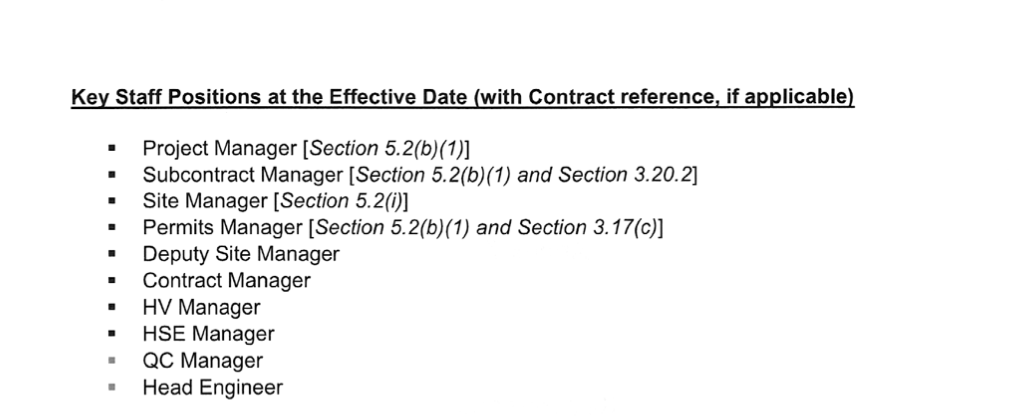

## Creating Agents

In [3]:
import os
from crewai import Agent, Task, Crew
from crewai_tools import SerperDevTool,apeWebsiteTool

# Define agents
subcontract_manager_agent = Agent(
    role="Subcontract Manager",
    goal="Manage subcontractors and subcontracts",
    backstory="An expert in contract management and subcontractor oversight",
    tools=[search_tool, scrape_tool],
    verbose=True
)

inspection_agent = Agent(
    role="Inspection Agent",
    goal="Inspect and supervise the works performed by subcontractors",
    backstory="A specialist in construction inspection and quality assurance",
    tools=[scrape_tool],
    verbose=True
)

compliance_agent = Agent(
    role="Compliance Agent",
    goal="Ensure subcontractor compliance with legal and contractual obligations",
    backstory="An expert in legal compliance and contract enforcement",
    tools=[search_tool],
    verbose=True
)

payment_agent = Agent(
    role="Payment Agent",
    goal="Manage payments to subcontractors",
    backstory="A financial with experience in managing subcontractor payments",
    tools=[search_tool],
    verbose=True
)

# Define tasks
assign_subcontract_manager = Task(
    description="Assign a qualified subcontract manager to oversee subcontractor activities",
    expected_output="A designated subcontract manager with clear responsibilities",
    agent=subcontract_manager_agent
)

inspect_subcontractor_works = Task(
    description="Inspect the works performed by subcontractors to ensure compliance with contract terms",
    expected_output="Inspection reports and compliance certificates",
    agent=inspection_agent
)

verify_compliance = Task(    
    description="Verify that subcontractors comply with all legal and contractual obligations",
    expected_output="Compliance verification reports",
    agent=compliance_agent
)

manage_payments = Task(
    description="Manage and process payments to subcontractors",
    expected_output="Payment records and receipts",
    agent=payment_agent
)

# Define crew
subcontract_management_crew = Crew(
    agents=[subcontract_manager_agent, inspection_agent, compliance_agent, payment_agent],
    tasks=[assign_subcontract_manager, inspect_subcontractor_works, verify_compliance, managements],
    verbose=True,
    planning=True
)

# Execute the crew
result = subcontract_management_crew.kickoff()

# Print the result
print("Subcontractor management crew executed successfully.")


/Users/Zeryan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


TypeError: unsupported operand type(s) for |: 'type' and 'NoneType'